<xarray.DataArray 'alb' (south_north: 362, west_east: 231)> Size: 334kB
[83622 values with dtype=float32]
Coordinates:
  * west_east    (west_east) float64 2kB -1.07e+05 -1.06e+05 ... 1.23e+05
  * south_north  (south_north) float64 3kB -1.42e+05 -1.41e+05 ... 2.19e+05
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  ALBEDO
    units:        -
    stagger:      
    pyproj_srs:   +proj=lcc +lat_0=47.3000068664551 +lon_0=11.3999996185303 +...


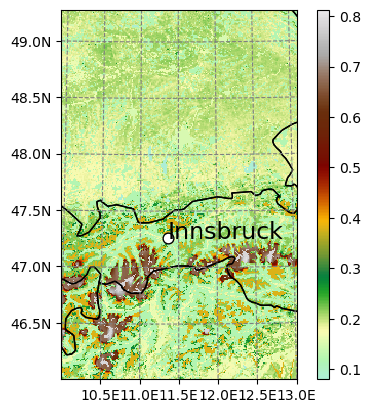

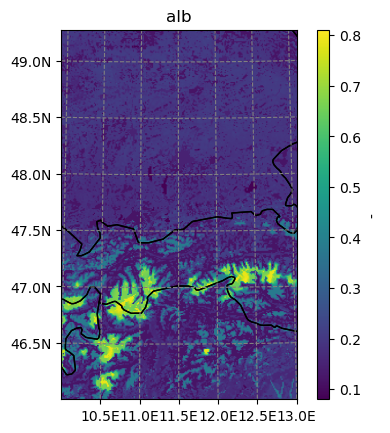

In [1]:
%run ../WRF/read_wrf_helen.ipynb
%run ../confg

In [2]:
%%capture
"""Compare different models (ICON, AROME, UKMO, WRF_ACINN) with radiosonde, in one plot with pressure as y-variable"""
import warnings

import xarray as xr

import metpy
import metpy.calc as mpcalc
import numpy as np
import pandas as pd
import wrf
from matplotlib import pyplot as plt
from metpy.plots import SkewT
from metpy.units import units
from netCDF4 import Dataset

warnings.filterwarnings("ignore")

In [3]:
# Specify the launch date and time
launch_date = pd.to_datetime('2017-10-16 02:15:05',
                             format='%Y-%m-%d %H:%M:%S')

time_for_model = pd.to_datetime('2017-10-16 03:00:00',
                                format='%Y-%m-%d %H:%M:%S')  # TODO can change here the time
#time_for_model = ds

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


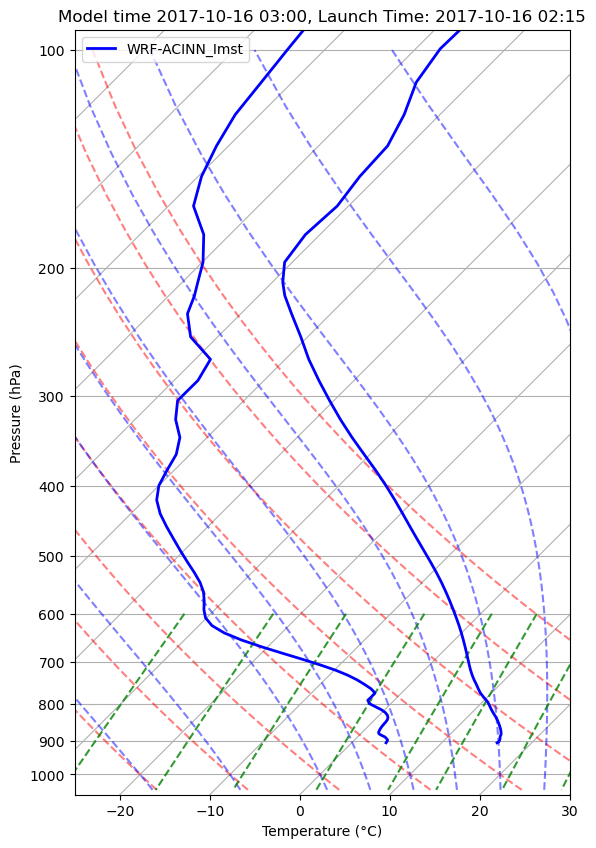

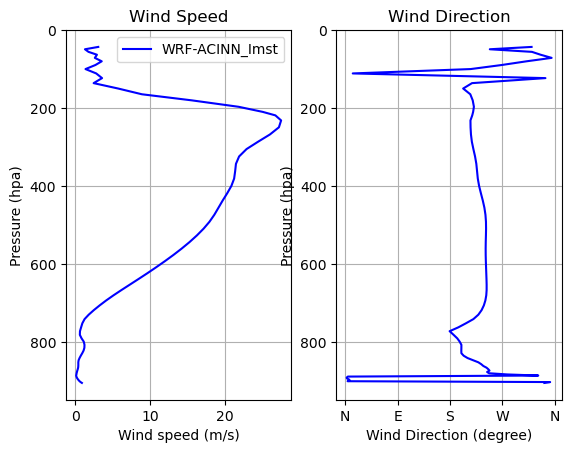

In [4]:
#WRF_ACINN

def read_radiosonde_wrf_acinn_imst():
    """read in radiosonde data from WRF ACINN"""
    df_acinn = read_wrf_fixed_point_and_time(day=16, hour=3, minute=0, latitude=station_files_zamg["IMST"]["lat"],
                                             longitude=station_files_zamg["IMST"]["lon"])
    return df_acinn

df_wrf_acinn_imst = read_radiosonde_wrf_acinn_imst()

fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45, rect=(0.1, 0.1, 0.55, 0.85))

skew.plot(df_wrf_acinn_imst["pressure"].values, df_wrf_acinn_imst["temperature"].values, color=colordict["WRF_ACINN"], label="WRF-ACINN_Imst",linewidth=2)
skew.plot(df_wrf_acinn_imst["pressure"].values, df_wrf_acinn_imst["dewpoint"].values, color=colordict["WRF_ACINN"],linewidth=2)


# Change to adjust data limits and give it a semblance of what we want
skew.ax.set_adjustable('datalim')

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

plt.title(
    f"Model time {pd.to_datetime(time_for_model).strftime('%Y-%m-%d %H:%M')}, Launch Time: {pd.to_datetime(launch_date).strftime('%Y-%m-%d %H:%M')}")

skew.ax.set_xlabel('Temperature (°C)')
skew.ax.set_ylabel('Pressure (hPa)')
skew.ax.set_xlim(-25, 30)
skew.ax.set_ylim(1000, 100)

plt.legend()

plt.savefig(dir_PLOTS + "/wrf_acinn_radiosounding_imst")



fig, axarr = plt.subplots(nrows=1, ncols=2)
axlist = axarr.flatten()

ff_wrf_helen = mpcalc.wind_speed(df_wrf_acinn_imst["u"], df_wrf_acinn_imst["v"])
dd_wrf_helen = mpcalc.wind_direction(df_wrf_acinn_imst["u"], df_wrf_acinn_imst["v"])


axlist[0].plot(ff_wrf_helen, df_wrf_acinn_imst["pressure"], label="WRF-ACINN_Imst", color=colordict["WRF_ACINN"])


axlist[0].invert_yaxis()
# ax.set_yscale('log')
axlist[0].set_ylabel("Pressure (hpa)")
axlist[0].set_xlabel("Wind speed (m/s)")
axlist[0].set_title("Wind Speed")
axlist[0].legend()
axlist[0].grid(True)
    
    
axlist[1].plot(dd_wrf_helen, df_wrf_acinn_imst["pressure"], label="WRF-ACINN_Imst", color=colordict["WRF_ACINN"])

axlist[1].invert_yaxis()
# ax.set_yscale('log')
axlist[1].set_ylabel("Pressure (hpa)")
axlist[1].set_xlabel("Wind Direction (degree)")
axlist[1].set_title("Wind Direction")
axlist[1].grid(True)
xticks = np.arange(0, 361, 90)
xtick_labels = ['N', 'E', 'S', 'W', 'N']
axlist[1].set_xticks(xticks)
axlist[1].set_xticklabels(xtick_labels)


plt.savefig(dir_PLOTS + "/wrf_acinn_wind_Imst")